# MODEL SPEC
* Available SOTA model identifiers (Only available for manual Override) :

| Model Type    | Identifiers   |
| ------------- | ------------- |
|   VGG	        |'vgg16' 'vgg19'|
|   ResNet      |	'resnet18' 'resnet34' 'resnet50' 'resnet101' 'resnet152'|
|   SE-ResNet   |	'seresnet18' 'seresnet34' 'seresnet50' 'seresnet101' 'seresnet152'|
|   ResNeXt     |	'resnext50' 'resnext101'|
|   SE-ResNeXt  |	'seresnext50' 'seresnext101'|
|   SENet154    |	'senet154'|
|   DenseNet    |	'densenet121' 'densenet169' 'densenet201'|
|   Inception   |	'inceptionv3' 'inceptionresnetv2'|
|   MobileNet   |	'mobilenet' 'mobilenetv2'|
|   EfficientNet|	'efficientnetb0' 'efficientnetb1' 'efficientnetb2' 'efficientnetb3' 'efficientnetb4' 'efficientnetb5' 'efficientnetb6' 'efficientnetb7'|

## Instructions
* **Select model_name**
* **Select model_arch**


In [0]:
model_name='inceptionv3' # @param ['vgg19','resnet152','densenet201','inceptionv3','inceptionrestnetv2','mobilenetv2','efficientnetb7']
model_arch='pspnet' # @param ['unet','pspnet']
model_iden=f"{model_name}_{model_arch}"

# MOUNT GOOGLE Drive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Change your working directory

In [3]:
 cd /content/gdrive/My\ Drive/CMFD/

/content/gdrive/My Drive/CMFD


# TPU CHECK
The model trains faster in TPU (approximately 17 times)

In [4]:
!pip3 install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 450kB 39.4MB/s 
     |████████████████████████████████| 3.9MB 37.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=167451e2ae7b574c2491c07b615a7e02036fe5b265c4dce21b48c52ecd63fdf8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: 

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime;')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.1.0
Running on TPU  ['10.34.149.226:8470']
INFO:tensorflow:Initializing the TPU system: 10.34.149.226:8470


INFO:tensorflow:Initializing the TPU system: 10.34.149.226:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# FIXED PARAMETERS
**noisy-students** weights are only available for effieicent net


In [6]:
from glob import glob 
import os 

BUCKET='tfalldata' # @param
TFIDEN='CMFDTF'  # @param
if model_arch=='pspnet':
  IMG_DIM=288
else:
  IMG_DIM=256 
DATA_DIM=256 # @param
NB_CHANNEL=3 # @param
BATCH_SIZE=256 # @param
BUFFER_SIZE=1024 # @param
TRAIN_DATA=10240 # @param
EVAL_DATA=1024 # @param
EPOCHS=250 # @param

TRANSFER_LEARNING='imagenet' # @param
TOTAL_DATA=TRAIN_DATA+EVAL_DATA
STEPS_PER_EPOCH = TOTAL_DATA//BATCH_SIZE
EVAL_STEPS      = EVAL_DATA//BATCH_SIZE
GCS_PATH='gs://{}/{}'.format(BUCKET,TFIDEN)
print(GCS_PATH)
WEIGHT_DIR=os.path.join(os.getcwd(),'model_weights')
if not os.path.exists(WEIGHT_DIR):
  os.mkdir(WEIGHT_DIR)

WEIGHT_PATH=os.path.join(WEIGHT_DIR,'{}.h5'.format(model_iden))
if os.path.exists(WEIGHT_PATH):
  print('FOUND PRETRAINED WEIGHTS')
  LOAD_WEIGHTS=True 
else:
  print('NO PRETRAINED WEIGHTS FOUND')
  LOAD_WEIGHTS=False

gs://tfalldata/CMFDTF
FOUND PRETRAINED WEIGHTS


# Dataset wrapper with tf.data api

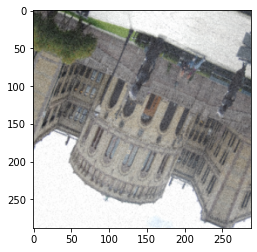

Image Batch Shape: (256, 288, 288, 3)


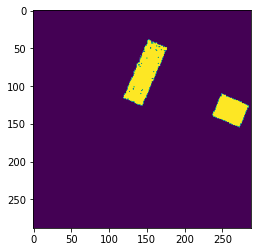

Target Batch Shape: (256, 288, 288, 1)
Target Unique Values: [0. 1.]


In [7]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
def data_input_fn(mode,img_dim): 
    
    def _parser(example):
        feature ={  'image'  : tf.io.FixedLenFeature([],tf.string) ,
                    'target' : tf.io.FixedLenFeature([],tf.string)
        }    
        parsed_example=tf.io.parse_single_example(example,feature)
        image_raw=parsed_example['image']
        image=tf.image.decode_png(image_raw,channels=3)
        image=tf.cast(image,tf.float32)/255.0
        image=tf.reshape(image,(DATA_DIM,DATA_DIM,3))
        image=tf.image.resize(image,(img_dim,img_dim))
        
        target_raw=parsed_example['target']
        target=tf.image.decode_png(target_raw,channels=1)
        target=tf.cast(target,tf.float32)/255.0
        target=tf.reshape(target,(DATA_DIM,DATA_DIM,1))
        target=tf.image.resize(target,(img_dim,img_dim),method='nearest')
        
        return image,target
    gcs_pattern=os.path.join(GCS_PATH,mode,'*.tfrecord')
    file_paths = tf.io.gfile.glob(gcs_pattern)
    dataset = tf.data.TFRecordDataset(file_paths)
    dataset = dataset.map(_parser)
    dataset = dataset.shuffle(BUFFER_SIZE,reshuffle_each_iteration=True)
    dataset = dataset.repeat()
    dataset = dataset.batch(BATCH_SIZE,drop_remainder=True)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset
eval_ds = data_input_fn("Eval",IMG_DIM)
train_ds = data_input_fn("Train",IMG_DIM)
for x,y in eval_ds.take(1):
  plt.imshow(np.squeeze(x[0]))
  plt.show()
  print('Image Batch Shape:',x.shape)
  plt.imshow(np.squeeze(y[0]))
  plt.show()
  print('Target Batch Shape:',y.shape)
  print('Target Unique Values:',np.unique(np.squeeze(y[0])))
  

# install segmentation-models

In [8]:
!pip3 install segmentation-models

# framework setup

In [9]:
import segmentation_models as sm
sm.set_framework('tf.keras')

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


# model creation

In [10]:
def ssim(y_true, y_pred):
  return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

def create_model():
  if model_arch=='unet':
    model=sm.Unet(model_name,input_shape=(IMG_DIM,IMG_DIM,NB_CHANNEL),classes=1,activation='sigmoid',encoder_weights=TRANSFER_LEARNING)  
  if model_arch=='pspnet':
    model=sm.PSPNet(model_name,input_shape=(IMG_DIM,IMG_DIM,NB_CHANNEL),classes=1,activation='sigmoid',encoder_weights=TRANSFER_LEARNING,downsample_factor=16)
 
  if LOAD_WEIGHTS:
    model.load_weights(WEIGHT_PATH)
  return model

with tpu_strategy.scope():
  model = create_model()
  model.compile(optimizer="Adam",
                loss=tf.keras.losses.mean_squared_error,
                metrics=[ssim,
                         sm.metrics.IOUScore(threshold=0.5), 
                         sm.metrics.FScore(threshold=0.5)])

model.summary()






87916544/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 288, 288, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 144, 144, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 144, 144, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 144, 144, 32) 0           batch_normalization[0][0]        
_____________________________

# Training

Train for 44 steps, validate for 4 steps
Epoch 1/250
44/44 [==============================] - 118s 3s/step - loss: 0.0052 - ssim: 0.9535 - iou_score: 0.8614 - f1-score: 0.9253 - val_loss: 0.0090 - val_ssim: 0.9412 - val_iou_score: 0.7791 - val_f1-score: 0.8749
Epoch 2/250
44/44 [==============================] - 44s 993ms/step - loss: 0.0048 - ssim: 0.9562 - iou_score: 0.8706 - f1-score: 0.9307 - val_loss: 0.0089 - val_ssim: 0.9456 - val_iou_score: 0.7802 - val_f1-score: 0.8755
Epoch 3/250
44/44 [==============================] - 46s 1s/step - loss: 0.0046 - ssim: 0.9584 - iou_score: 0.8770 - f1-score: 0.9343 - val_loss: 0.0090 - val_ssim: 0.9473 - val_iou_score: 0.7804 - val_f1-score: 0.8755
Epoch 4/250
44/44 [==============================] - 55s 1s/step - loss: 0.0045 - ssim: 0.9598 - iou_score: 0.8778 - f1-score: 0.9348 - val_loss: 0.0089 - val_ssim: 0.9478 - val_iou_score: 0.7824 - val_f1-score: 0.8767
Epoch 5/250
44/44 [==============================] - 47s 1s/step - loss: 0.0044

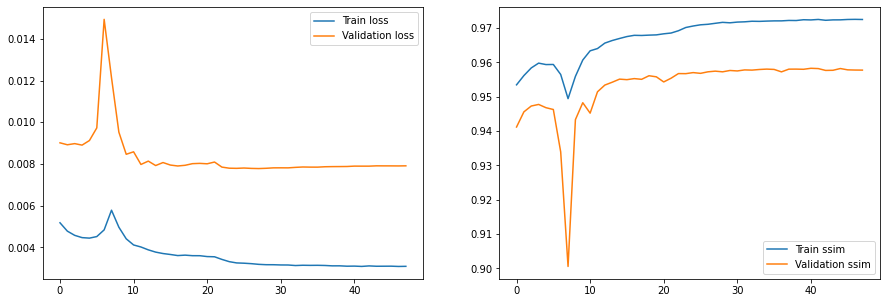

In [11]:

# reduces learning rate on plateau
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,
                               cooldown= 10,
                               patience=10,
                               verbose =1,
                               min_lr=0.1e-5)

mode_autosave = tf.keras.callbacks.ModelCheckpoint(WEIGHT_PATH,save_best_only=True)

# stop learining as metric on validatopn stop increasing
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20, 
                               verbose=1, 
                               mode = 'auto') 

callbacks = [mode_autosave, lr_reducer,early_stopping ]



history = model.fit(train_ds,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=eval_ds,
                    validation_steps=EVAL_STEPS,
                    callbacks=callbacks)

def plot_history(history):
  """
  Plots model training history 
  """
  fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(15,5))
  ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
  ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
  ax_loss.legend()
  ax_acc.plot(history.epoch, history.history["ssim"], label="Train ssim")
  ax_acc.plot(history.epoch, history.history["val_ssim"], label="Validation ssim")
  ax_acc.legend()
  plt.show()
# show history
plot_history(history)

# Evaluation

In [15]:
BATCH_SIZE=128 # @param
test_ds = data_input_fn("Test",IMG_DIM)
results = model.evaluate(test_ds,steps=1)

1/1 [==============================] - 14s 14s/step - loss: 0.0279 - ssim: 0.9324 - iou_score: 0.3346 - f1-score: 0.4946


1.0


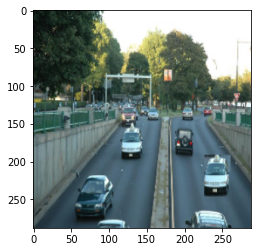

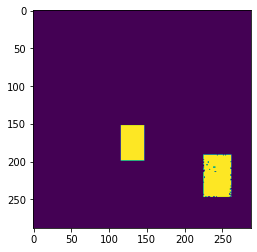

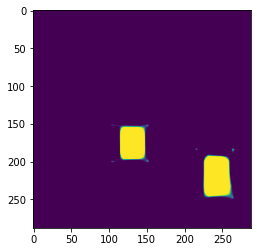

In [31]:
for x,y in test_ds.take(1):
  img=x[0]
  tgt=y[0]
  print(np.amax(img))
  prd=model.predict_on_batch([np.expand_dims(img,axis=0)])[0]
  plt.imshow(img)
  plt.show()
  plt.imshow(np.squeeze(tgt))
  plt.show()
  plt.imshow(np.squeeze(prd))
  plt.show()
  